In [171]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [172]:
# !pip3 install pydicom

import pydicom as dicom

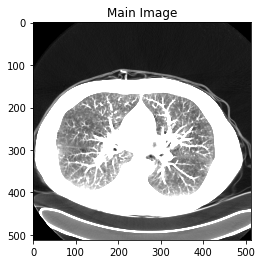

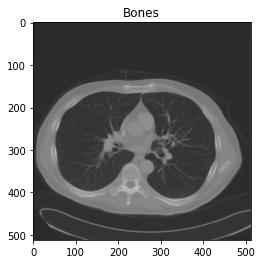

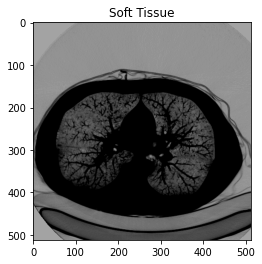

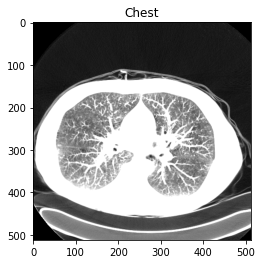

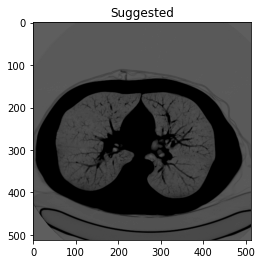

In [173]:
# Question 1 

def transform(ele, left, right):
    if ele > right:
        ele = 255
    elif ele < left :
        ele = 0
    else:
        ele = float(255*(ele - left))/(right-left)
        
    return int(ele)

def windowing(image, w, l):
    running_image = np.copy(image)
    left = l - w/2
    right = l + w/2
    
    t = np.vectorize(transform)
    
    return t(running_image, left, right)


ds = dicom.dcmread("../data/CT_scan.dcm")

# print(ds.PatientName)
image1 = ds.pixel_array
cv2.imwrite("../data/dcm_scan.jpg", image1)

plt.imshow(image1 ,cmap='gray', vmin=0, vmax=255)
plt.title("Main Image")
plt.show()

levelling_bones = windowing(image1, 3000, 1000)

plt.imshow(levelling_bones, cmap='gray', vmin=0, vmax=255)
plt.title("Bones")
plt.show()
cv2.imwrite("../data/window_bones.jpg", levelling_bones)

levelling_soft_tissue = windowing(image1, 350, 50)

plt.imshow(255- levelling_soft_tissue, cmap='gray', vmin=0, vmax=255)
plt.title("Soft Tissue")
plt.show()
cv2.imwrite("../data/window_soft_tissue.jpg", levelling_soft_tissue)

levelling_chest = windowing(image1, 1500, -500)

plt.imshow(levelling_chest, cmap='gray')
plt.title("Chest")
plt.show()
cv2.imwrite("../data/window_chest.jpg", levelling_chest)


sug1 = windowing(image1, 1500, -200)

plt.imshow(255-sug1, cmap='gray', vmin=0, vmax=255)
plt.title("Suggested")
plt.show()
# cv2.imwrite("../data/window_suggestion_chest.jpg", sug1)

# Okay, so here we shall declare our W and L and perform the windowing operations


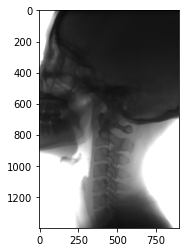

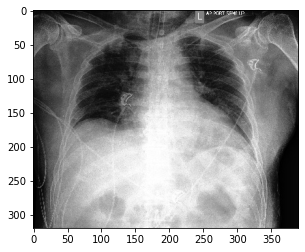

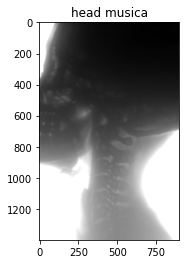

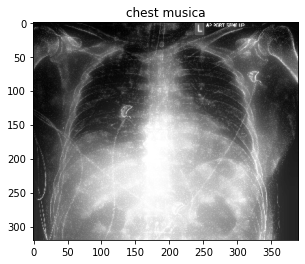

True

In [174]:
# Question 2 

from PIL import Image

def musica(img, p, l):

    layer = img.copy()
    gaussian_pyramid = [layer]
    for i in range(l):
        layer = cv2.pyrDown(layer)
        gaussian_pyramid.append(layer)

    # Laplacian Pyramid
    layer = gaussian_pyramid[l-1]
    laplacian_pyramid = [layer]
    for i in range(l-1, 0, -1):
        size = (gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0])
        gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
        laplacian = cv2.subtract(gaussian_pyramid[i - 1], gaussian_expanded)
        laplacian_pyramid.append(laplacian)
        
    # here we are going to apply the filter now
    for plate in laplacian_pyramid:
        m,n = np.shape(plate)
        plate_max = np.max(plate)
        
        arr1 = np.power(np.absolute(plate), p)
        arr1 = arr1 * (plate_max**(1-p)) 
        arr2 = np.sin(plate)
        
        plate = np.multiply(arr1, arr2)
        
    
    reconstructed_image = laplacian_pyramid[0]
    for i in range(1, l):
        size = (laplacian_pyramid[i].shape[1], laplacian_pyramid[i].shape[0])
        reconstructed_image = cv2.pyrUp(reconstructed_image, dstsize=size)
        reconstructed_image = cv2.add(reconstructed_image, laplacian_pyramid[i])

    return reconstructed_image

head = Image.open('../data/xray.bmp')
head = np.array(img)

cv2.imwrite("../data/musica_head_original.jpg", head)

plt.imshow(head ,cmap='gray', vmin=0, vmax=255)
plt.show()

chest = cv2.imread("../data/chest.jpg")
chest = cv2.cvtColor(chest,cv2.COLOR_BGR2GRAY)
plt.imshow(chest,cmap='gray')
plt.show()


# we are going to 6 levels of musica
levels = 10
p_value = 0.5

head_musica = musica(head, p_value, levels)
plt.imshow(head_musica, cmap='gray')
plt.title("head musica")
plt.show()

cv2.imwrite("../data/musica_head.jpg", head_musica)


chest_musica = musica(chest, p_value, levels)
plt.imshow(chest_musica, cmap='gray')
plt.title("chest musica")
plt.show()
cv2.imwrite("../data/musica_chest.jpg", chest_musica)

In [175]:
# Question 3

# get the image inputs
# make copies, smoothen them
# take logs, and subtract them . that should be our output image apparently
retina = cv2.imread("../data/retina.JPG")
retina = cv2.cvtColor(retina,cv2.COLOR_BGR2RGB)

skin = cv2.imread("../data/skin.jpg")
skin = cv2.cvtColor(skin,cv2.COLOR_BGR2RGB)

retinex_test = cv2.imread("../data/retinex_test.png")
retinex_test = cv2.cvtColor(retinex_test,cv2.COLOR_BGR2RGB)

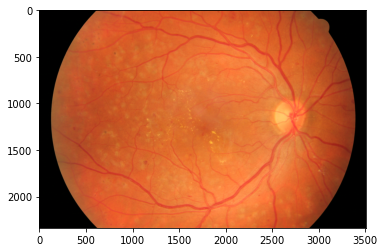

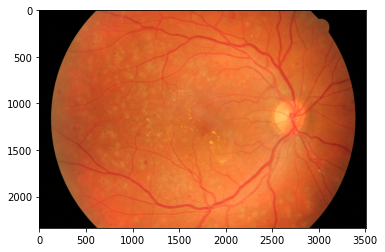

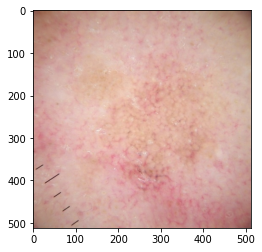

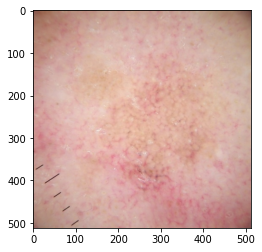

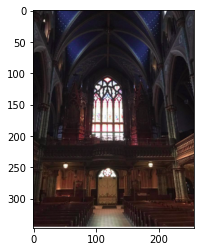

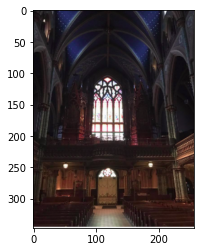

True

In [176]:
def retinex(image):
    image = image + 0.001
    smooth_image = np.copy(image)
    
    smooth_image = cv2.GaussianBlur(smooth_image,(3,3),cv2.BORDER_DEFAULT)

    final_image = np.log10(image) - np.log10(smooth_image)
    
    return (image - final_image).astype('int')


plt.imshow(retina)
plt.show()

retina_retinex = retinex(retina)

plt.imshow(retina_retinex)
plt.show()
cv2.imwrite("../data/retina_retinex.jpg", retina_retinex)


plt.imshow(skin)
plt.show()

skin_retinex = retinex(skin)

plt.imshow(skin_retinex)
plt.show()
cv2.imwrite("../data/skin_retinex.jpg", skin_retinex)



plt.imshow(retinex_test)
plt.show()

test_retinex = retinex(retinex_test)

plt.imshow(test_retinex)
plt.show()
cv2.imwrite("../data/test_retinex.jpg", test_retinex)